# Data Mining II - PCA 


## Competencies 
__Dimension Reduction Methods__ <br>
Implements dimension reduction methods to identify significant variables.  

## Write Up 
__Research Question__ <br>
Can Principal Component Analysis (PCA) help determine the most informative variables for this hospital chain?

__Goals__ <br>
Can Principal Component Analysis (PCA) help determine the most informative variables for this hospital chain?

__Explanation of the PCA__ <br>
Principal Component Analysis is used to help determine the most important variables through dimension reduction. “Machine learning models with many input variables or higher dimensionality tend to fail when operating on a higher input dataset. PCA helps in identifying relationships among different variables & then coupling them.” (Vadapalli, 2020) PCA analyzes the data set through the transformation of the initial features into separate components  by applying a linear transformation and then ordering them by importance. (Kaloyanova, 2021) From here we would actively look at scree plots, the Kaiser rule, or total variance to determine the number of components we would like to keep. The expected outcomes after performing PCA would be a set of high-quality variables that can then be used to perform different analyses and answer more in-depth questions in the future.  These variables will also indicate the amount of variation these chosen components account for within the data set. 

__Summary of Assumptions__ <br>
One assumption of PCA is linearity. A linear relationship is assumed between features meaning that it is most effective when there are relationships between the variables. “There must be linearity in the data set, i.e., the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.” (Vadapalli, 2020) 

# Code

In [1]:
# Importing packages
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [2]:
# Importing medical data CSV and creating the medical_data DataFrame
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_clean.csv")

In [3]:
# Looking at columns, non-null counts and data types 
medical_data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
medical_data = medical_data.select_dtypes(exclude='object')
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Zip                 10000 non-null  int64  
 2   Lat                 10000 non-null  float64
 3   Lng                 10000 non-null  float64
 4   Population          10000 non-null  int64  
 5   Children            10000 non-null  int64  
 6   Age                 10000 non-null  int64  
 7   Income              10000 non-null  float64
 8   VitD_levels         10000 non-null  float64
 9   Doc_visits          10000 non-null  int64  
 10  Full_meals_eaten    10000 non-null  int64  
 11  vitD_supp           10000 non-null  int64  
 12  Initial_days        10000 non-null  float64
 13  TotalCharge         10000 non-null  float64
 14  Additional_charges  10000 non-null  float64
 15  Item1               10000 non-null  int64  
 16  Item2

In [5]:
medical_data.shape

(10000, 23)

## Continuous Data Set Variables
To carry our Principal Component Analysis (PCA), we began with a total of 20 continuous variables. 

In [6]:
medical_data = medical_data.drop(columns=['CaseOrder','Zip','Children'])
medical_data.shape

(10000, 20)

In [7]:
# Duplicates 
medical_duplicates = medical_data.duplicated()
print(medical_duplicates.value_counts())

False    10000
Name: count, dtype: int64


In [8]:
# Missing Values 
# Sum of all null values within each column 
medical_data.isnull().sum()

Lat                   0
Lng                   0
Population            0
Age                   0
Income                0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Initial_days          0
TotalCharge           0
Additional_charges    0
Item1                 0
Item2                 0
Item3                 0
Item4                 0
Item5                 0
Item6                 0
Item7                 0
Item8                 0
dtype: int64

In [9]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(medical_data)
med_scaled = scaler.transform(medical_data)

In [10]:
# Export CSV of scaled data 
medical_data.to_csv("C:/Users/Makayla Avendano/Desktop/medical_clean_scaled.csv")

In [11]:
pca_med = PCA(n_components=20)
pca_med.fit(med_scaled)
pca_med_final = pca_med.transform(med_scaled)

# Create DataFrame
pca_med_df = pd.DataFrame(pca_med_final, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
print(pca_med_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.519279 -1.165458  0.584076 -0.465665  0.640412 -0.759761  0.211459   
1    -0.366928 -0.811333  0.555689 -0.044774  1.180660  0.665514 -0.328139   
2    -0.176833 -1.650509  0.725806  0.471197 -0.487736  0.655628  0.013341   
3     2.428912 -1.725013  0.917456 -0.655614 -1.014806 -0.285474 -0.609386   
4    -2.405192 -2.135004 -1.722286  0.341696  0.289997 -1.247178 -0.894971   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -2.146748  0.716268 -1.388553  0.402625  0.189080  0.153134 -1.021901   
9996 -0.672880  2.017320  2.390191 -1.753044 -0.160581 -0.143495 -1.386020   
9997 -1.966834  1.768333 -0.244818 -0.102637 -0.121117  0.505154 -0.807894   
9998  0.799182  1.410894 -1.115197 -0.738233 -1.449046  0.801979  0.657582   
9999  0.640899  1.958693  0.112263 -0.014940  1.388740 -0.953508  0.685806   

           PC8       PC9      PC10      PC11      PC12      PC1

In [12]:
print("Variance explained by all 20 principal components =", sum(pca_med.explained_variance_ratio_ * 100))

Variance explained by all 20 principal components = 100.00000000000003


## Variance of Each Component

In [13]:
varex1 = pca_med.explained_variance_ratio_ * 100
var_df1 = pd.DataFrame(varex1.round(2), columns=['Captured Variance Per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
print(var_df1)                  

      Captured Variance Per PC
PC1                      14.77
PC2                       9.97
PC3                       8.58
PC4                       8.25
PC5                       6.14
PC6                       5.20
PC7                       5.17
PC8                       5.03
PC9                       5.01
PC10                      4.88
PC11                      4.85
PC12                      3.85
PC13                      3.74
PC14                      3.48
PC15                      2.94
PC16                      2.67
PC17                      2.36
PC18                      1.64
PC19                      1.42
PC20                      0.06


## Identification of the Total Number of Components
Using the Kaiser criterion, the total number of principal components is 9. The Kaiser criterion states to keep all principal components with an eigenvalue of 1 or higher and remove the remaining. Looking at the table of eigenvalues, it is evident that PC1 through PC 9 are at 1 or above. This information is also evident in the scree plot with the red horizontal line at 1. 

In [14]:
eigenvalues = pca_med.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(4), columns=['Eigenvalues Per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
print(eigen_df)

      Eigenvalues Per PC
PC1               2.9553
PC2               1.9938
PC3               1.7166
PC4               1.6500
PC5               1.2273
PC6               1.0398
PC7               1.0339
PC8               1.0067
PC9               1.0013
PC10              0.9766
PC11              0.9704
PC12              0.7702
PC13              0.7477
PC14              0.6961
PC15              0.5877
PC16              0.5333
PC17              0.4730
PC18              0.3273
PC19              0.2832
PC20              0.0117


PC10 is equal to 0.97 which is not at or above 1. As the principal components get higher, the eigenvalues decrease. This means that at PC9 (1.0013) we cut off principal components and decide to keep 1 – 9. 

Using the Kaiser criterion, the selected principal components would be PC1 – PC9. This information means that when moving forward with different analyses for this hospital chain we can keep the principal components 1 – 9 and look at different aspects of the data in a more concentrated way. 

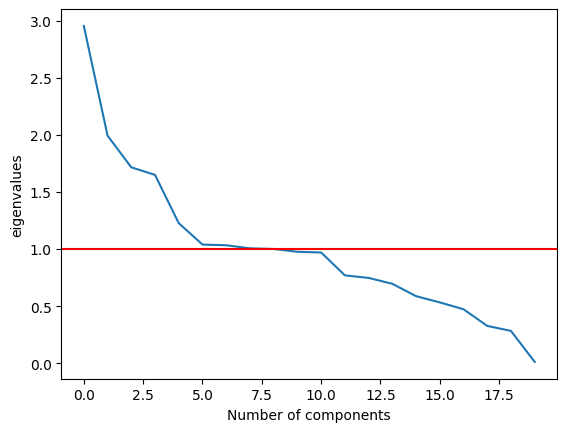

In [15]:
# Scree Plot - Eigenvalues 
plt.plot(eigenvalues)
plt.xlabel('Number of components') 
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

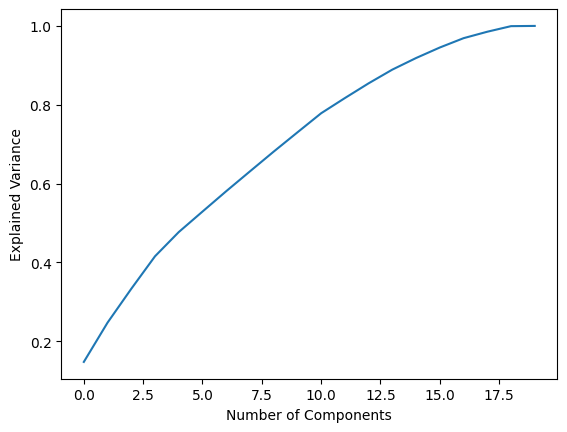

In [16]:
# Explained Variance
plt.plot(np.cumsum(pca_med.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [17]:
# Cumulative sum of Array 
cumulative_variance = np.cumsum(pca_med.explained_variance_ratio_ * 100)
print(cumulative_variance) 

[ 14.77481132  24.74280689  33.32514056  41.57445317  47.71051037
  52.90890158  58.07766136  63.11069389  68.11652334  72.99906842
  77.85050105  81.70093108  85.43930706  88.91954146  91.85797657
  94.52427229  96.88920029  98.52571505  99.94147862 100.        ]


## Total Variance Captured by Components

The variance total for the principal components is relatively low at 68%, but dependent on the share holders wants and needs we can adjust if needed to include principal components based on a certain variance total instead of utilizing the Kaiser rule. 

In [18]:
# Variance explained by certain amount of PC's - Kaiser Rule eigenvalues (9)
np.cumsum(pca_med.explained_variance_ratio_ * 100) [8]

68.11652333769824